# Hodgkin-Huxley IK Model

This example shows how the Hodgkin-Huxley potassium current (IK) toy model can be used.

This model recreates an experiment where a sequence of voltages is applied to a [giant axon from a squid](https://en.wikipedia.org/wiki/Squid_giant_axon), and the resulting potassium current is measured. For information on the science behind it, see the [original 1952 paper](https://doi.org/10.1113/jphysiol.1952.sp004764).


In [1]:
import pints
import pints.toy
import matplotlib.pyplot as plt

model = pints.toy.HodgkinHuxleyIKModel()

We can get an example set of parameters using the `suggested_parameters()` method:

In [2]:
x0 = model.suggested_parameters()

The voltage protocol used in the model has a fixed duration, which we can see using `suggested_duration()`:

In [3]:
model.suggested_duration()

1200

And it can also provide a suggested sequence of sampling times:

In [4]:
times = model.suggested_times()

Using the suggested parameters and times, we can run a simulation:

In [5]:
values = model.simulate(x0, times)

This gives us all we need to create a plot of current versus time:

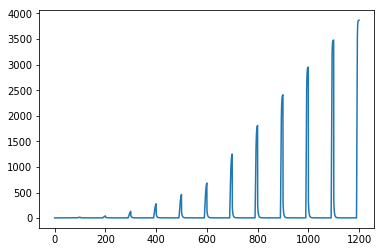

In [6]:
plt.figure()
plt.plot(times, values)
plt.show()

The voltage protocol used to generate this data consists of 12 segments, of 100ms each.
Each segment starts with 90ms at the _holding potential_, followed by a 10ms step to an increasing _step potential_.
During this step, a current is elicited, while the signal at the holding potential is almost zero.

A common way to represent this data is to show only the data during the step, and to _fold_ the steps over each other. This can be done using the `fold()` method:

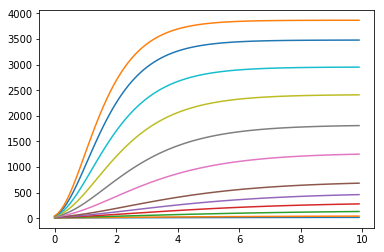

In [7]:
plt.figure()
for t, v in model.fold(times, values):
    plt.plot(t, v)
plt.show()

This recreates Figure 3 in the original paper.